TESTE:
# Título Grande
## Subtítulo
**Negrito** e *itálico*  
- Lista de itens
- Outro item
1. Lista numerada
2. Segundo item
[Link para o Google](https://www.google.com)

# Análise Exploratória dos Dados (EDA)

Inicialmente foi realizado a leitura do dataset para a realização da análise dos dados e observar o conjunto de variaveis.

O dataset contem diversas informações interessantes, tais como o preço por noite do aluguel, o tipo do espaço, a localização, a disponibilidade anual do quarto, a quantidade de noites minimas para reserva e o número de avaliações. Essas informações, em geral, são importantes para a escolha do local pelo cliente.

Além disso, há outras informações que diz respeito à identificação do anuncio na plataforma e sobre o Host, como os "id"s, o nome do Host e o nome do anuncio.

In [74]:
# Bibliotecas
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
import pandas as pd
import geopandas
import geodatasets

C:\Users\danil\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [54]:
# Leitura do DataSet & Dicionario de informações
help = {'id': 'Atua como uma chave exclusiva para cada anúncio nos dados do aplicativo',
        'nome': 'Representa o nome do anúncio',
        'host_id': 'Representa o id do usuário que hospedou o anúncio',
        'host_name': 'Contém o nome do usuário que hospedou o anúncio',
        'bairro_group': 'Contém o nome do bairro onde o anúncio está localizado',
        'bairro': 'Contém o nome da área onde o anúncio está localizado',
        'latitude': 'Contém a latitude do local',
        'longitude': 'Contém a longitude do local',
        'room_type': 'Contém o tipo de espaço de cada anúncio',
        'price': 'Contém o preço por noite em dólares listado pelo anfitrião',
        'minimo_noites':'Contém o número mínimo de noites que o usuário deve reservar',
        'numero_de_reviews': 'Contém o número de comentários dados a cada listagem',
        'ultima_review': 'Contém a data da última revisão dada à listagem',
        'reviews_por_mes': 'Contém o número de avaliações fornecidas por mês',
        'calculado_host_listings_count': 'Contém a quantidade de listagem por host',
        'disponibilidade_365': 'Contém o número de dias em que o anúncio está disponível para reserva'}

df = pd.read_csv('teste_indicium_precificacao.csv')
df.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


---
O resumo obtido pelo describe() mostra que existem alugueis em que o preço está definido como 0, enquanto existem outliers com valores ultrapassando 10000 dolares a noite.

Além disso, existem também lugares em que o mínimo de noites superam o percentil de 75% (5 dias) muito significativamente, com valores máximos de 1250 noites.

O primeiro caso, pode significar locais altamente luxuosos enquanto que o segundo pode significar que o host busca por menores ocorrências de troca de hóspedes. 

Esses outliers podem ser prejudiciais no momento das análises e do treinamento do modelo, podendo ser interessante removê-los posteriormente

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
count,4.889400e+04,4.889400e+04,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000,48894.000000
mean,1.901753e+07,6.762139e+07,40.728951,-73.952169,152.720763,7.030085,23.274758,1.090928,7.144005,112.776169
std,1.098288e+07,7.861118e+07,0.054529,0.046157,240.156625,20.510741,44.550991,1.597294,32.952855,131.618692
min,2.595000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,9.472371e+06,7.822737e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.040000,1.000000,0.000000
50%,1.967743e+07,3.079553e+07,40.723075,-73.955680,106.000000,3.000000,5.000000,0.370000,1.000000,45.000000
75%,2.915225e+07,1.074344e+08,40.763117,-73.936273,175.000000,5.000000,24.000000,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


---
Algumas colunas possuem valores faltantes, como as colunas "ultima review" e "reviews_por_mes", que de acordo com df.head() e o df.info(), estão preenchidos com dados NaN.

Para esses valores ausentes, com a intenção de impedir possiveis erros de código durante a análise, foi definido a seguinte estrutura de substituição:


Nas colunas...
- "nome": NaN será substituido pela a palavra "For rent"
- "host_name": NaN será preenchido por "Unknown"
- "ultima_review": NaN por 0 
- "reviews_por_mes": NaN por 0 --> Estamos assumindo que o espaço nunca recebeu reviews

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [11]:
df.isnull().sum()

id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [13]:
df['nome'] = df['nome'].fillna("For rent")
df['host_name'] = df['host_name'].fillna("Unknown")
df['ultima_review'] = df['ultima_review'].fillna(0)
df['reviews_por_mes'] = df['reviews_por_mes'].fillna(0)

In [14]:
df.isnull().sum()

id                               0
nome                             0
host_id                          0
host_name                        0
bairro_group                     0
bairro                           0
latitude                         0
longitude                        0
room_type                        0
price                            0
minimo_noites                    0
numero_de_reviews                0
ultima_review                    0
reviews_por_mes                  0
calculado_host_listings_count    0
disponibilidade_365              0
dtype: int64

In [10]:
print('N° de Bairros:', len(df.bairro_group.unique()), 
    '\nN° de lugares:', len(df.bairro.unique()),
    '\nN° de host:', len(df.host_name.unique()))

N° de Bairros: 5 
N° de lugares: 221 
N° de host: 11453


## Hipóteses de négocio
***

A partir das informações fornecidas pelo dataset, com o objetivo de desenvolver um modelo para predição do preço de um aluguel, buscamos relacionar as variaveis que melhor impactam o valor de um aluguel. 

Portanto, é esperado que algumas hipóteses sejam formuladas, tais como:

1. O tipo do espaço deve impactar fortemente o preço: 
- É esperado que os "Entire home/apt" (Apartamentos/casas inteiro) stenham preços mais altos do que os demais
- Private room ("Quartos privados") tenham preços intermediários
- Shared room ("Quartos compartilhados") sejam os mais baratos

2. A localização (Bairros) também deve influenciar os preços (Lógica da oferta e demanda):
- Regiões centrais ou turísticas devem ter preços, em média, mais elevados
- Regiões mais afastadas dos centros devem ter preços mais baixos
- Bairros com muitas listagens podem ter muita concorrência,  reduzindo o valor dos preços.

3. A avaliação do espaço também pode indicar maiores demandas (Lógica da oferta e demanda):
- Anuncios com muitos reviews pode significar alta procura e consequentemente ter preços competitivos
- Anuncios com poucas avaliações pode indicar espaços novos ou poucos atrativos

4. Alta disponibilidade anual pode diminuir os valores dos preços (Lógica da oferta e demanda)
- Espaços muito disponíveis tendem a ter preços mais baixos devido à necessidade de manter a ocupação alta.
- Espaços pouco disponiveis podem ter preços mais elevados, uma vez que são mais raros a disponibilidade.

5. Mínimo de noites mais baixos (como minimo_noites = 1) podem ter preços mais baixos, pois podem ser locais com foco em atender turistas de curta duração. Em contrapartida, mínimo de noites mais altos pode indicar preços mais baixos

---
### Hipótese 1: O tipo do espaço deve impactar fortemente o preço: 

É esperado que o preço médio por noite siga a ordem:


Entire home/apt > Private room > Shared room


Para avaliar essa hipótese, foi realizado o boxplot do preço pelo tipo de espaço (Figura 1). Conforme o esperado, a análise visual do boxplot da figura da direita comprova a ordem esperada, uma vez que a mediana, o terceiro quartil e o limite superior foram maiores para o "Entire home/apt", seguido pelos "Private rooms" e por ultimo os "Shared rooms".

No gráfico da esquerda, porém, os outliers observados não apresentam um caracter distintivo de preços entre o "Entire home/apt" e o "Private room". Por outro lado, como essa fração, em geral, corresponde a cerca de menos de 5% dos dados pôde-se desprezá-los.

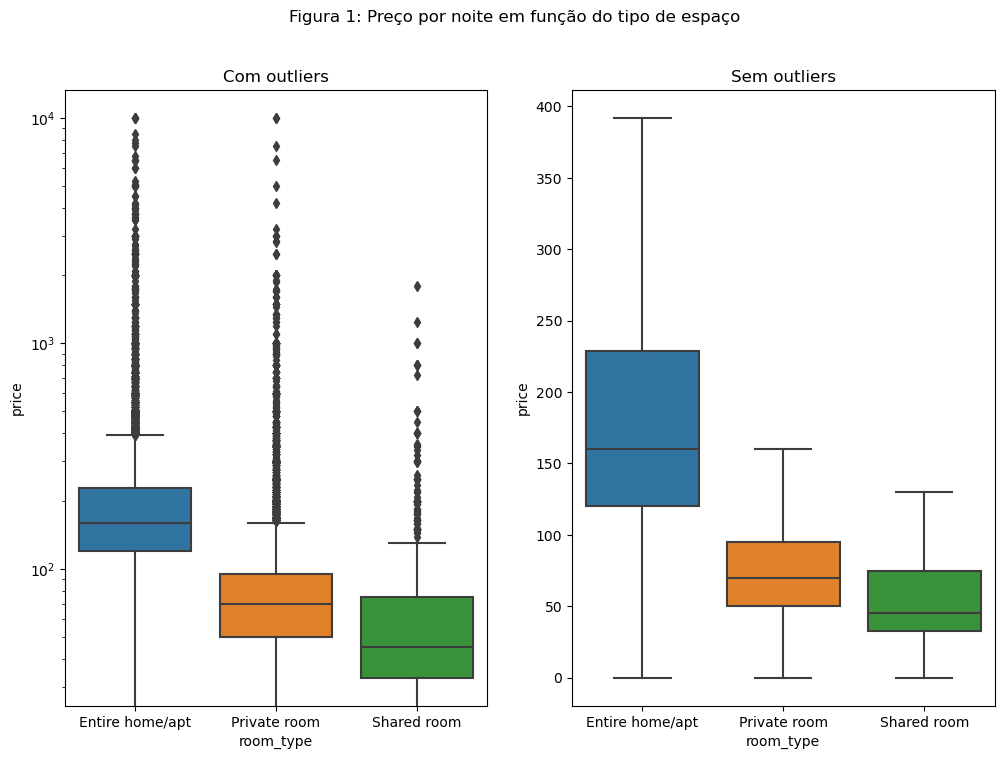

In [21]:
# Boxplot Preço x Tipo de espaço
fig, ax = plt.subplots(ncols=2, figsize=(12,8))
ax[0].set_title('Com outliers')
ax[0].set_yscale('log')
ax[1].set_title('Sem outliers')
sn.boxplot(data=df, x='room_type', y='price', ax=ax[0])
sn.boxplot(data=df, x='room_type', y='price', ax=ax[1], showfliers=False)
fig.suptitle('Figura 1: Preço por noite em função do tipo de espaço')
plt.show()

---
### Hipótese 2: A localização (Bairros) também deve influenciar os preços (Lógica da oferta e demanda)

É esperado que:

- Regiões centrais ou turísticas tenham preços, em média, mais elevados
- Regiões mais afastadas dos centros tenham preços mais baixos
- Bairros com muitas listagens podem ter muita concorrência,  reduzindo o valor dos preços.

É esperado que o preço médio por noite siga a ordem:


Entire home/apt > Private room > Shared room


Para avaliar essa hipótese, foi realizado o boxplot do preço pelo tipo de espaço (Figura 1). Conforme o esperado, a análise visual do boxplot da figura da direita comprova a ordem esperada, uma vez que a mediana, o terceiro quartil e o limite superior foram maiores para o "Entire home/apt", seguido pelos "Private rooms" e por ultimo os "Shared rooms".

No gráfico da esquerda, porém, os outliers observados não apresentam um caracter distintivo de preços entre o "Entire home/apt" e o "Private room". Por outro lado, como essa fração, em geral, corresponde a cerca de menos de 5% dos dados pôde-se desprezá-los

In [113]:
# Descartando os outliers
df = df[df['price'] < df['price'].quantile(0.95)]

# Centroids de cada bairro
bairro_ny = pd.DataFrame({
    'latitude': [40.7831, 40.7128, 40.7306, 40.6643, 40.8448],  # Coordenadas de exemplo (bairros de NY)
    'longitude': [-73.9712, -74.0060, -73.9352, -73.9385, -73.8648],
    'city': ['Manhattan', 'Brooklyn', 'Queens', 'Staten Island', 'Bronx']
})

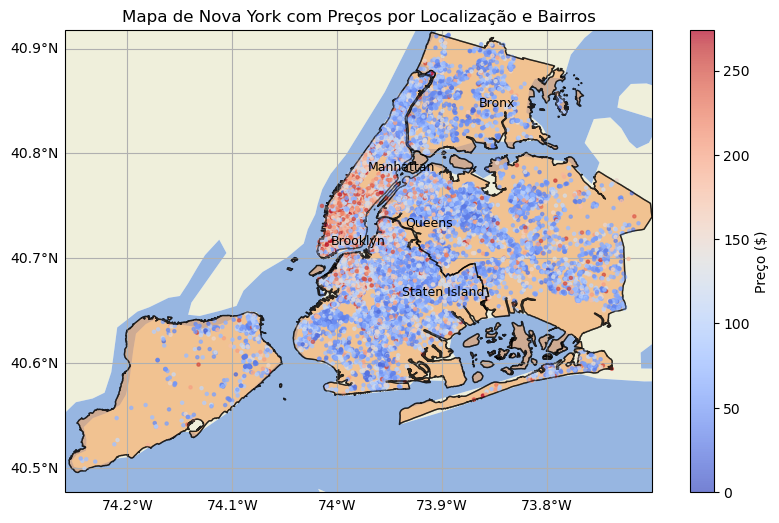

In [120]:
# Criando o gráfico com Cartopy
gny = geopandas.read_file(geodatasets.get_path("nybb"))
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Definindo limites da área de Nova York
ax.set_extent([-74.2591, -73.7004, 40.4774, 40.9176], crs=ccrs.PlateCarree())
ax.set_title('Mapa de Nova York com Preços por Localização e Bairros')

# Plotando os pontos de latitude, longitude com preços
sc = ax.scatter(df['longitude'], df['latitude'], c=df['price'], cmap='coolwarm', alpha=0.7, s=5,zorder=10, transform=ccrs.PlateCarree())

# Adicionando o nome dos bairros
for i in range(len(bairro_ny)):
    ax.text(bairro_ny['longitude'][i] , bairro_ny['latitude'][i], bairro_ny['city'][i], fontsize=9, ha='left', transform=ccrs.PlateCarree(), zorder=30)

#ax.add_feature(cfeature.STATES)
gny.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='sandybrown', zorder=1, lw=1)
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
df_.to_crs(ccrs.PlateCarree()).plot(alpha=0.6, edgecolor="k", ax=ax, facecolor='None', zorder=20)
# Adicionando a colorbar para os preços
plt.colorbar(sc, ax=ax, label="Preço ($)")
ax.gridlines(draw_labels={"bottom": "x", "left": "y"})
# Mostrar o gráfico
plt.show()


# 
Buscando encontrar relações entre os preços e as condições de mínimos de noites e a disponibilidade anual, foi plotado gráficos do preços em função dessas duas variaveis. 

A figura da esquerda mostra a relação entre Price e o Mínimo de noites, com legendas de cor para o tipo de espaço e legenda de marcador para os bairros, enquanto que a figura da direita evidencia a relação entre Price e a disponibilidade anual. Além disso, 

A análise visual de ambas figuras não mostra nenhuma relação 

Além disso, Manhattan e Brooklyn apresentaram maiores assimetrias acima da mediana, maiores preços associados e uma maior densidade de outliers com valores significamente elevados do que os demais bairros. A única exceção, é para os espaços "shared room", cujo bairro Staten Island, obteve uma maior assimetria acima da mediana do que os espaços em Brooklyn, pórem ainda abaixo - em valor de preço - do que os "Shared room" em Manhattan. Por outro lado, sua mediana foi a mais baixa em relação a todos os bairros e muito proxima do 1° quartil.

Esse resultado, conforme esperado, mostra a influencia que o tipo de espaço e a localidade do espaço tem sobre o Preço do aluguel.

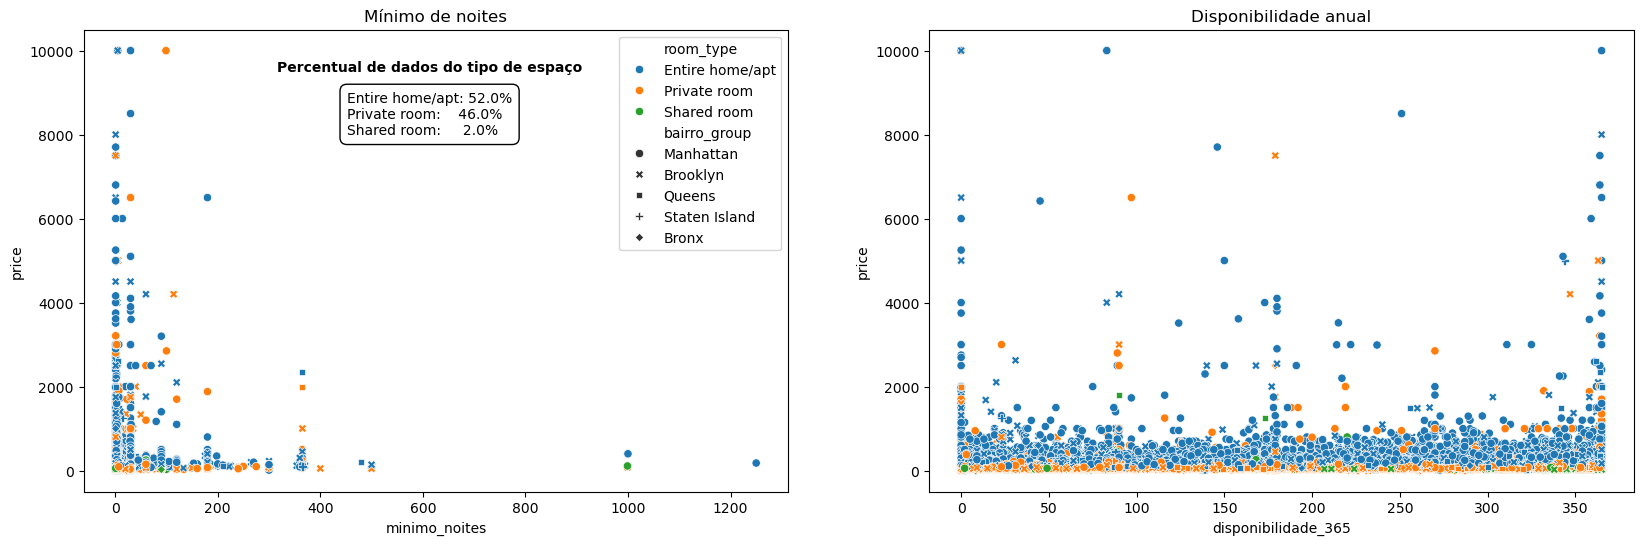

In [307]:
fig, ax = plt.subplots(ncols=2, figsize=(20,6))
ax[0].set_title('Mínimo de noites')
ax[1].set_title('Disponibilidade anual')
sn.scatterplot(data=df, x='minimo_noites', y='price', hue='room_type',style='bairro_group',  ax=ax[0])
plt.text(x=-390, y=9500,
         s="Percentual de dados do tipo de espaço", 
         fontweight='bold')
plt.text(x=-350, y=8000,
         s=f'Entire home/apt: {round(len(df[df.room_type=="Entire home/apt"]) / len(df) * 100, 0)}%\n'
           f'Private room:    {round(len(df[df.room_type=="Private room"]) / len(df) * 100, 0)}%\n'
           f'Shared room:     {round(len(df[df.room_type=="Shared room"]) / len(df) * 100, 0)}%', 
         fontsize=10,
         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.5'))

sn.scatterplot(data=df, x='disponibilidade_365', y='price', hue='room_type',style='bairro_group',  ax=ax[1])
ax[1].legend().set_visible(False)
#sn.histplot(df, x='disponibilidade_365', hue='price', palette='viridis', bins=20, ax=ax[1])

plt.show()